Top 10 most frequent:
1 = and 713
2 = the 680
3 = i 585
4 = to 541
5 = a 468
6 = of 401
7 = my 360
8 = that 347
9 = is 344
10 = in 319

Top 10 least frequent:
10 = punish'd 1
9 = jointure 1
8 = demand 1
7 = statue 1
6 = whiles 1
5 = figure 1
4 = sacrifices 1
3 = glooming 1
2 = pardon'd 1
1 = punished 1


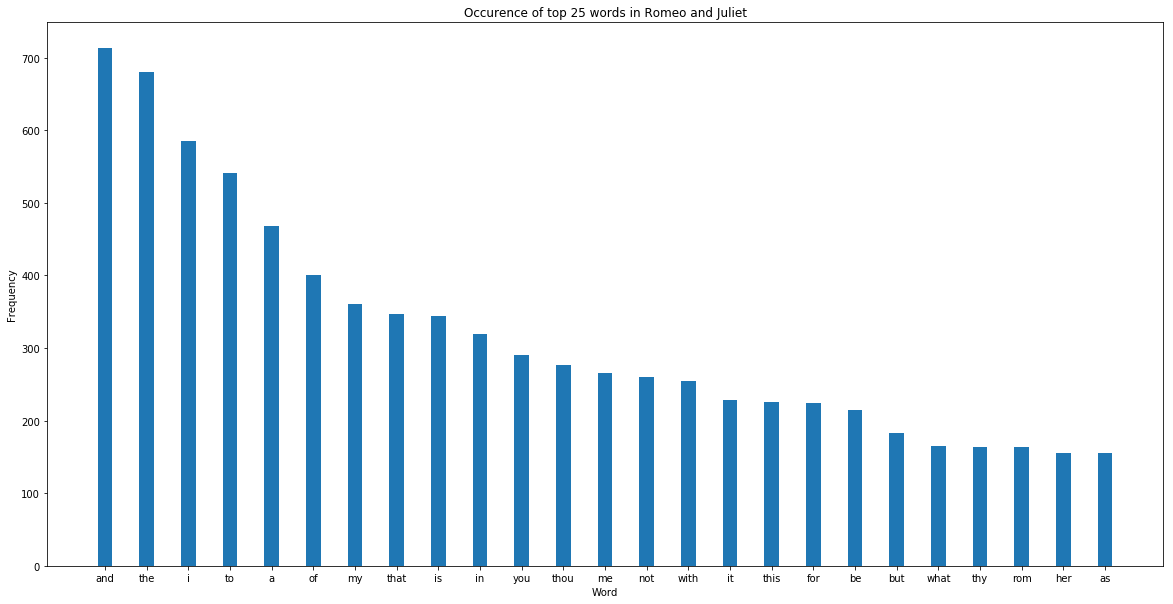

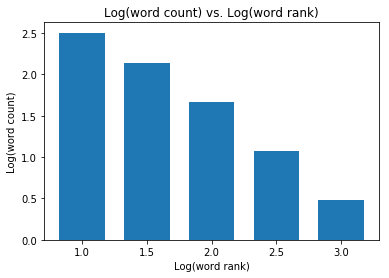

In [14]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import string
import sys
import math

rj = open('romeoandjuliet.txt','r')

uniquewords = []
uniquewordcount = []
wordcount={}
count=[]

# Read rj into a list defined by every word and convert to all lowercase 
rjwords = rj.read().split()
rjwords = [word.lower() for word in rjwords]
# Take out all punctuation (i.e. ',' '.' etc.)
rjwords = [word.strip(string.punctuation) for word in rjwords]

# Dictionary of every word and its frequency
for word in rjwords:
    if word in wordcount:
        wordcount[word] += 1
    else:
        wordcount[word] = 1     

# List of words in descending order of frequency
wordcountsorted = sorted(wordcount, key = wordcount.get, reverse=True)

# Top 10 most frequent words and their respective wordcount
print('Top 10 most frequent:')
t = 1
for word in wordcountsorted[0:10]:
    print(t, '=', word, wordcount[word])
    t+=1

print('')

# Top 10 least frequent words and their respective wordcount
print('Top 10 least frequent:')
b = 10
for word in wordcountsorted[3785:3795]:
    print(b, '=', word, wordcount[word])
    b-=1
    
### Top 10 most frequent words are mainly conjunctions and pronouns and non-proper nouns. This is because those are
### naturally the words that will be used the most in any piece of writing.

### Top 10 least frequent words are adjectives and verbs, commonly dark in tone, which may indicate that Romeo
### and Juliet is actually quite a happy play!!!!! (not really...) 

### I attempted to make a bar graph with every unique word (3796 words) and their frequency, but it was too large
### for human readability, so I will instead rank the top 25 words, present that bar graph, and then try the bonus
### question which asks for the log graph. In addition, the repetition of words unnoticed as non-unique due to apostrophes
### instead of "ed" such as "punished" and "punish'd" only accounted for <5% of the total amount of words, so I let them
### remain in the list instead of worrying about optimizing the list for something insignificant.

# List of top 25 words
topwords = []
i = 0
while i <= 24:
    topwords.append(wordcountsorted[i])
    i+=1
    
# List of frequency of top 25 words
topwordscount = []
for word in topwords:
    topwordscount.append(wordcount[word])

# Bar graph for occurence of top 25 words in Romeo and Juliet
width = .35
N1 = len(topwords)
ind1 = np.arange(N1)
x1data = topwords
y1data = topwordscount

plt.figure(figsize=(20, 10))  
plt.bar(x1data, y1data, width)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Occurence of top 25 words in Romeo and Juliet')

plt.show()


### For log(word count) vs. log(word rank) bar graph ###

# List of base 10 log of word counts for five log positions starting at 1 with interval of .5 in wordcountsorted
# wordcountsorted only has order of magnitude 3 total words
logallwordscount = []
k = 0
for word in wordcountsorted:
    if k == 9: #log(10) = 1
        logallwordscount.append(math.log10(wordcount[word]))
    elif k == 31: #log(32) = ~1.5
        logallwordscount.append(math.log10(wordcount[word]))
    elif k == 99: #log(100) = 2
        logallwordscount.append(math.log10(wordcount[word]))
    elif k == 316: #log(317) = ~2.5
        logallwordscount.append(math.log10(wordcount[word]))
    elif k == 999: #log(1000) = 3
        logallwordscount.append(math.log10(wordcount[word]))
    k+=1

# Bar graph for log(word count) vs. log(word rank)
N2 = len(logallwordscount)
ind2 = np.arange(N2)
x2data = [1,1.5,2,2.5,3]
y2data=logallwordscount


plt.bar(x2data, y2data, width)
plt.xlabel('Log(word rank)')
plt.ylabel('Log(word count)')
plt.title('Log(word count) vs. Log(word rank)')

plt.show()

### I'm having trouble interpreting the log graph, but my best guess is essentially that for each log position change for 
### word rank, there is actually an almost equivalent step change in the log of the word count, which is an
### interesting quantitative trend for the words in Romeo and Juliet, but I'm not sure what else it could mean.